# Vertrauensintervall

Bei der Bestimmung des Verwerfungsbereiches beim $z$-Test, gehen wir vom einem wahren (aber unbekannten) Wert $\mu$ aus und einer bekannten Standardabweichung aus. Dann bestimmen wird das Quartil $q_{0.025}$ und $q_{0.975}$ bei einem zweiseitigen Test und Signifikanzniveau $\alpha=0.05$. 

Wir gehen von einer Normalverteilungskurve $X\sim\mathcal{N}(5,2^2)$ aus. Dann sind die  $q_{0.025}$- und $q_{0.975}$-Quantile 

In [31]:
from scipy.stats import norm
norm.ppf(q=[0.025,0.975], loc=5 , scale=2)

array([1.08007203, 8.91992797])

Unten ist die Normalverteilungskurve mit dem Verwerfungsbereich rot eingezeichnet.

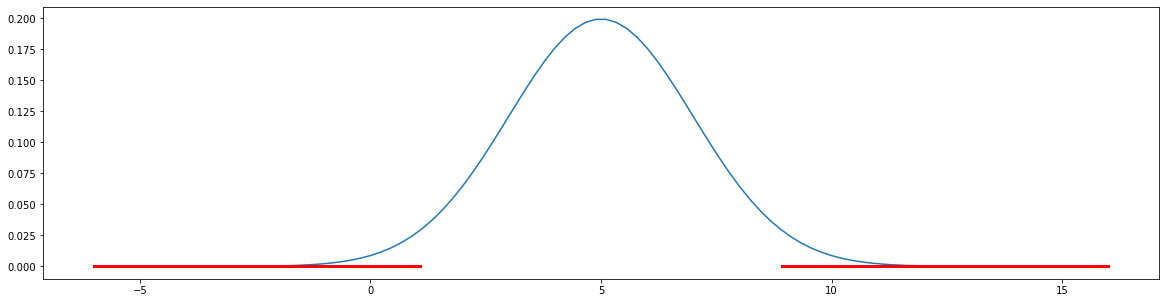

In [32]:
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
plt.rcParams["figure.figsize"] = (20,5)

# Bereich der x-Achse
aw = -6
ew = 16

# Berechnung der Funktionswerte
mean = 5
sd = 2
x = np.linspace(start=aw, stop=ew, num=100)
y = norm.pdf(x, loc=mean, scale=sd)

plt.plot(x,y)

#Bestimmung der Quantile
q_025, q_975 = norm.ppf(q=[0.025,0.975], loc=mean , scale=sd)

# Plot des Verwerfungsbereiches
plt.plot([aw, q_025], [0, 0], color="red", linewidth=3)
plt.plot([q_975, ew], [0, 0], color="red", linewidth=3)

Liegt nun $\overline{x}_n$ im Verwerfungsbereich (roter Bereich), dann wird die Nullhypothese $H_0$ verworfen. 


Nun ist das wahre $\mu$ praktisch immer unbekannt und für die Bestimmung der Verwerfungsbereiches wurde ein Wert einfach angenommen. Wir können die Frage auch einfach umkehren: Wir kennen $\overline{x}_n$ und fragen uns, für welche $\mu$ wird $H_0$ _nicht_ verworfen wird.

Dies kann man rechnerisch herleiten, wir machen es hier aber graphisch.

Wir haben nun $\overline{x}_n=6$ _gegeben_ und zeichnen den Verwerfungsbereich ein. Diese $\overline{x}_n=6$ wird nun _konstant_ gelassen.  In der Skizze unten sind:

- Die dicken roten Linien entsprechen dem Verwerfungsbereich für $\mu=\overline{x}_n=6$. 
- Die dünnen roten Linien entsprechen dem Verwerfungsbereich für $\mu_0=5$.
- Der vertikale schwarze Strich entspricht dem $\mu=\overline{x}_n=6$
- Der vertikale blaue Strich entspricht dem $\mu_0=5$

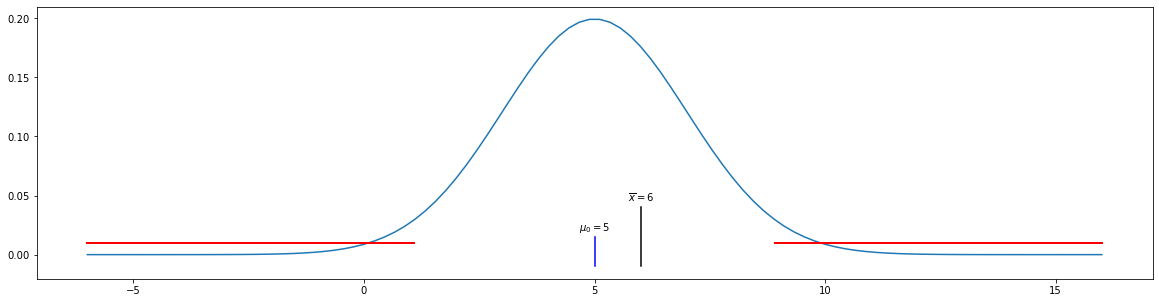

In [4]:
# Berechnung der Funktionswerte
mean = 5

x = np.linspace(start=aw, stop=ew, num=100)
y = norm.pdf(x, loc=mean, scale=sd)

plt.plot(x,y)

#Bestimmung der Quantile
q_025, q_975 = norm.ppf(q=[0.025,0.975], loc=mean , scale=sd)

plt.plot([6, 6], [-.01, .04], color="black")
plt.plot([mean, mean], [-.01, .015], color="blue")
plt.text(mean,0.02, r"$\mu_0=$"+str(mean),ha="center")
plt.text(6,0.045, r"$\overline{x}=6$",ha="center")

# Plot des Verwerfungsbereiches
q_025_n, q_975_n = norm.ppf(q=[0.025,0.975], loc=mean , scale=2)
plt.plot([aw, q_025_n], [0.01, 0.01], color="red", linewidth=2)
plt.plot([q_975_n, ew], [0.01, 0.01], color="red", linewidth=2)


Wir stellen fest, dass beide Werte $\overline{x}$ nicht innerhalb der Ablehnungsbereiche liegen. 

Die Idee ist nun, dass wir $\mu_0$ erhöhen und $\overline{x}_n=6$ konstant lassen. Dazu definieren wir die folgende Funktion vi(), wobei jeweils $\mu_0$ übergeben wird:

In [33]:
def vi(mean):
    x = np.linspace(start=aw, stop=ew, num=100)
    y = norm.pdf(x, loc=mean, scale=sd)
    plt.plot(x,y)
    #Bestimmung der Quantile
    plt.plot([6, 6], [-.01, .04], color="black")
    plt.plot([mean, mean], [-.01, .015], color="blue")
    plt.text(mean,0.02, r"$\mu_0=$"+str(mean),ha="center")
    plt.text(6,0.045, r"$\overline{x}=6$",ha="center")
    q_025, q_975 = norm.ppf(q=[0.025,0.975], loc=mean , scale=sd)
    # Plot der Verwerfungsbereiches für mu=5
    q_025_n, q_975_n = norm.ppf(q=[0.025,0.975], loc=mean , scale=2)
    plt.plot([aw, q_025_n], [0.01, 0.01], color="red", linewidth=2)
    plt.plot([q_975_n, ew], [0.01, 0.01], color="red", linewidth=2)
    

    

Die Idee für das Vertrauensintervall ist, dass wir alle Nullhypothesenwerte bestimmen, für die $\overline{x}_n=6$ _nicht_ abgelehnt wird. 

Wir wählen $\mu_0=7$, dann $\mu_0=8$ und $\mu_0=10.5$.

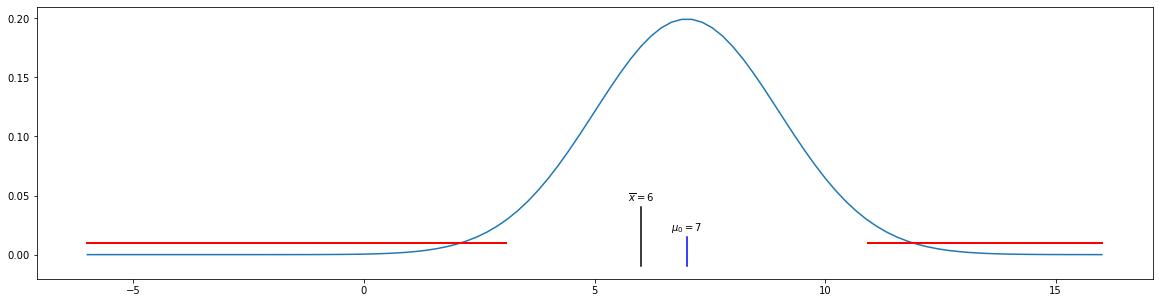

In [22]:
vb(7)

Für $\mu_0=7$, $\mu_0=8$ ist die Situation ähnlich: In beiden Fällen liegt $\overline{x}_n=6$ nicht innerhalb des Verwerfungsbereichs, so dass $H_0$ für $\overline{x}_n=6$ _nicht_ verworfen wird.

Die Situation ändert sich für $\mu_0=10.5$, wo dieser Wert $\overline{x}_n=6$ (schwarze Linie) innerhalb des Verwerfungsbereiches von $\mu_0=10.5$ (rote Linien) liegt, so dass die Nullhypothese $H_0$ nun verworfen wird.  

Wir wollen dies auf eine andere Weise veranschaulichen. Wir nehmen nicht den Ablehnungsbereich, sondern das, was _nicht_ zum Ablehnungsbereich gehört. Dies ist unten in grün eingezeichnet. 

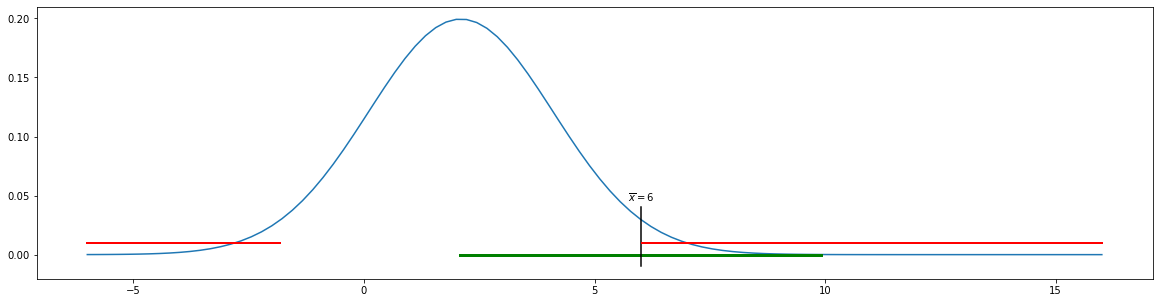

In [23]:
# Determine the function values
mean = 2.1

x = np.linspace(start=aw, stop=ew, num=100)
y = norm.pdf(x, loc=mean, scale=sd)

plt.plot(x,y)

#Determine the quantiles
q_025, q_975 = norm.ppf(q=[0.025,0.975], loc=6 , scale=sd)

# Plot of the confidence interval 
plt.plot([q_025, q_975], [0, 0], color="green", linewidth=3)
plt.text(6,0.045, r"$\overline{x}=6$",ha="center")
plt.plot([6, 6], [-.01, .04], color="black")
q_025_n, q_975_n = norm.ppf(q=[0.025,0.975], loc=mean , scale=2)
plt.plot([aw, q_025_n], [0.01, 0.01], color="red", linewidth=2)
plt.plot([q_975_n, ew], [0.01, 0.01], color="red", linewidth=2) 

Zum Beispiel liegt der Wert 0 nicht im Vertrauensintervall:

In [28]:
print("Vertrauensintervall", q_025,q_975)

Vertrauensintervall 2.080072030919891 9.919927969080108


Wir haben oben gesehen, dass die Nullhypothese dann verworfen wird. Wenn also der wahre Wert $\mu_0$ ausserhalb des Vertrauensintervalls liegt, dann wird die Nullhypothese abgelehnt. 

Dies führt uns zu einer anderen Interpretation des Vertrauensintervalls. Es enthält alle $\mu_0$-Werte, für die die Nullhypothese _nicht_ verworfen wird. Es sagt uns also, in welchem Intervall sich der wahre $\mu_0$ befindet. Und wie immer gilt dies nicht absolut, sondern mit einer bestimmten Wahrscheinlichkeit. In diesem Fall liegt 95% des wahren $\mu_0$'s im Vertrauensintervall. Wir sprechen daher auch von einem 95%-Vertrauensintervall. 

Damit haben wir eine weitere Möglichkeit für eine Testentscheidung:
- Wenn $\mu_0$ der Nullhypothese im Vertrauensintervall liegt, wird die Nullhypothese _nicht_ abgelehnt. 
- Liegt $\mu_0$ der Nullhypothese _nicht_ im Vertrauensintervall, so wird die Nullhypothese verworfen.

Hier noch die Funktion vi_2():

In [34]:
def vi_2(mean):
    # Berechnung der Funktionswerte
    x = np.linspace(start=aw, stop=ew, num=100)
    y = norm.pdf(x, loc=mean, scale=sd)

    plt.plot(x,y)

    #Bestimmung der Quantile
    q_025, q_975 = norm.ppf(q=[0.025,0.975], loc=mean , scale=sd)
    print("Vertrauensintervall", q_025,q_975)
    plt.text(6,0.045, r"$\overline{x}=6$",ha="center")
    # Plot der Vertrauensintervall 
    plt.plot([q_025, q_975], [0, 0], color="green", linewidth=3)

    plt.plot([6, 6], [-.01, .04], color="blue")
    q_025_n, q_975_n = norm.ppf(q=[0.025,0.975], loc=mean , scale=2)
    plt.plot([aw, q_025_n], [0.01, 0.01], color="red", linewidth=2)
    plt.plot([q_975_n, ew], [0.01, 0.01], color="red", linewidth=2) 

Confidence interval 3.080072030919891 10.919927969080108


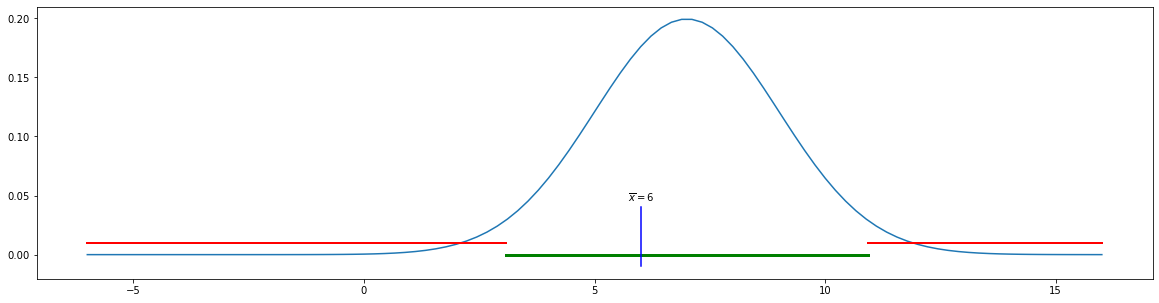

In [27]:
vb_2(7)

Wenn wir ein bisschen herumprobieren, sehen wir, dass das Vertrauensintervall etwa $[2.1, 9.1]$ ist.

Wir können das Vertrauensintervall auch wie folgt bestimmen. Beachte, dass für loc=... den beobachteten Durchschnitt 6 und _nicht_ ein $\mu_0$ verwendet wird.

In [29]:
norm.interval(alpha=0.95, loc=6, scale=2)

(2.080072030919892, 9.919927969080108)

## Simulation

Wir wählen nun zufällig einen Wert aus $\mathcal{N}(5, 2^2)$ aus und schauen ob dieser Wert im Vertrauensintervall liegt.

In [16]:
np.random.seed(1)
x = norm.rvs(size=1, loc=5, scale=2)
print(x)
norm.interval(alpha=0.95, loc=x, scale=2)

[8.24869073]


(array([4.32876276]), array([12.1686187]))

Der Wert liegt im Vertrauensintervall. Aber ist dies immer der Fall?

In [17]:
np.random.seed(106)
x = norm.rvs(size=1, loc=5, scale=2)
print(x)
norm.interval(alpha=0.95, loc=x, scale=2)

[9.32986987]


(array([5.40994191]), array([13.24979784]))

In diesem Fall liegt 5 nicht im Vertrauensintervall. Die Frage ist, wieviele Male dies der Fall ist. Dazu simulieren wir 1000 zufällige Werte aus $\mathcal{N}(5, 2^2)$ und berechnen deren Vertrauensintervall und schauen, ob dieser Wert im Vertrauensintervall liegt oder nicht. 

In [56]:
n = 100000
x = norm.rvs(loc=5, scale=2, size=n)
y = norm.interval(alpha=0.95, loc=x, scale=2)

yu = y[0]
yo = y[1]
k = 0
for i in range(n-1): 
   if (yu[i] <= 5 <= yo[i]) == False:
        k = k + 1
        
print(k)

5072


Jedesmal, wenn wir obigen Code ausführen erscheint eine andere Zahl, aber alle sind um die 50 oder 5% von 1000. Oder wir können 100 gleichzeitig ausgeben: 

In [57]:
def vi2(n):
    x = norm.rvs(loc=5, scale=2, size=n)
    y = norm.interval(alpha=0.95, loc=x, scale=2)

    yu = y[0]
    yo = y[1]
    k = 0
    for i in range(n-1): 
       if (yu[i] <= 5 <= yo[i]) == False:
            k = k + 1
        
    print(k, end=" ")
    
for i in range(100):
    vi2(1000)

37 50 38 43 55 51 49 39 43 51 49 49 56 50 48 40 49 53 53 39 41 43 61 49 47 58 59 49 51 44 54 57 46 49 50 53 53 53 51 44 49 46 48 53 43 44 45 56 54 45 57 57 50 54 52 64 52 52 46 56 56 73 42 37 45 60 55 48 49 56 45 60 49 46 59 44 59 44 50 36 50 54 45 52 43 49 49 54 52 51 50 48 43 60 70 49 57 51 58 49 

Wir können dies auch noch graphisch machen, aber nur 100 ausgewählten Werten und deren zugehörigen Vertrauensintervallen. Alle schwarzen Intervall enthalten den Wert 5 _nicht_.

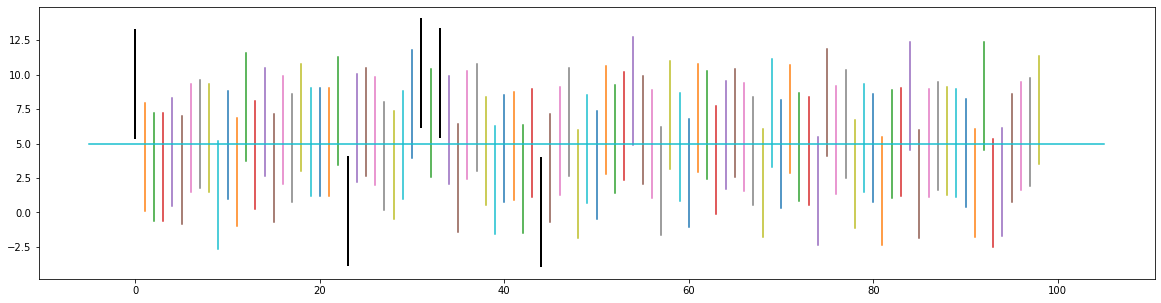

In [30]:
x = norm.rvs(loc=5, scale=2, size=100)
y = norm.interval(alpha=0.95, loc=x, scale=2)

yu = y[0]
yo = y[1]

for i in range(99): 
   plt.plot([i,i],[yu[i],yo[i]])
   if (yu[i] <= 5 <= yo[i]) ==False:
        plt.plot([i,i],[yu[i],yo[i]],c="black",linewidth=2)
        
plt.plot([-5,105],[5,5])

Auch hier ändern sich bei jedem Durchgang (wegen der Zufälligkeit) die Anzahl der schwarzen Striche, aber es immer um die 5 herum, also 5% von 100.